# QS2 Rotation-Vibration Spectrum of CO

## Importing data
Download your data from Moodle and import it as well as the necessary libraries:

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal as sg
import scipy.optimize as opt 
import numpy as np

%matplotlib inline
plt.style.use('seaborn-whitegrid')

# Import data
data = pd.read_csv('CO.csv')

Check your data has imported correctly:

In [5]:
data

,wav,int
0,399.9761,1.885617
1,400.0363,1.849771
2,400.0966,1.807714
3,400.1569,1.764329
4,400.2171,1.725723
...,...,...
59733,3999.7610,0.064732
59734,3999.8210,0.064738
59735,3999.8810,0.064728
59736,3999.9420,0.064703


Plot the experimental spectrum.

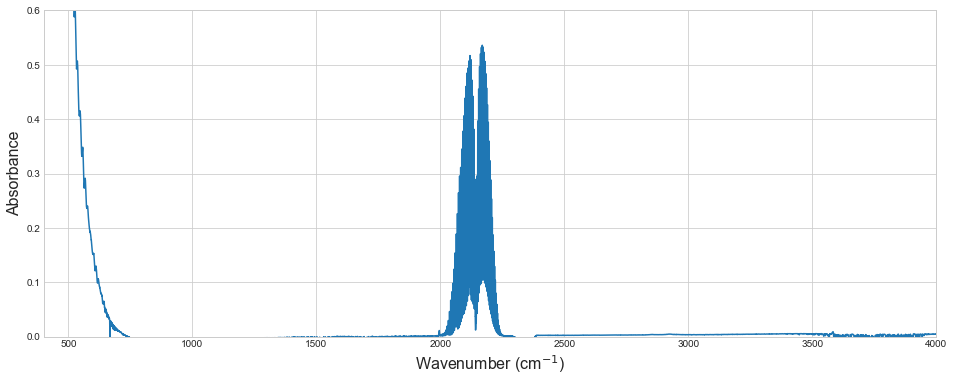

In [14]:
# Plot data
x = data['wav']
y = data['int']-0.06

fig = plt.figure(figsize=(16,6))
plt.plot(x,y) #update

xmin = 4000
xmax = 400 

plt.xlabel('Wavenumber (cm$^{-1}$)', size=16)
plt.ylabel('Absorbance',size=16)
#plt.title("TITLE", size=16)
plt.xlim(xmax,xmin)
plt.ylim(0,0.6)
plt.show()

## Pick the Peaks

Use the code below to pick the peak positions by adjusting the prominence and distance parameters within the [find_peaks](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html) function. Make sure that as many peaks have been picked as possible. Extra peaks or false peaks do not matter at this stage.

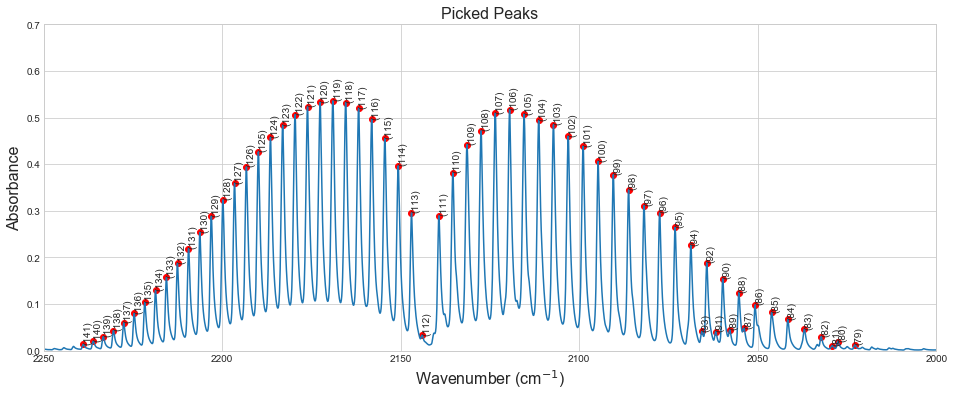

In [17]:
peaks = sg.find_peaks(y,prominence=.005, distance=None, height=0.01) # Adjust the parameters

fig = plt.figure(figsize=(16,6))
plt.plot(x[peaks[0]],y[peaks[0]],"ro")
plt.plot(x,y)
xmin = 2000
xmax = 2250
ymin = 0.0
ymax = 0.7
plt.xlim(xmax,xmin)
plt.ylim(ymin,ymax)

# Labelling the picked peaks
for i in range(len(peaks[0])):
    if x[peaks[0][i]] > xmin and x[peaks[0][i]] < xmax:
        stri = '({})'.format(i)
        plt.text(x[peaks[0][i]],y[peaks[0][i]]+0.005,stri,rotation=90)

plt.xlabel('Wavenumber (cm$^{-1}$)', size=16)
plt.ylabel('Absorbance',size=16)
plt.title("Picked Peaks", size=16)
plt.show()

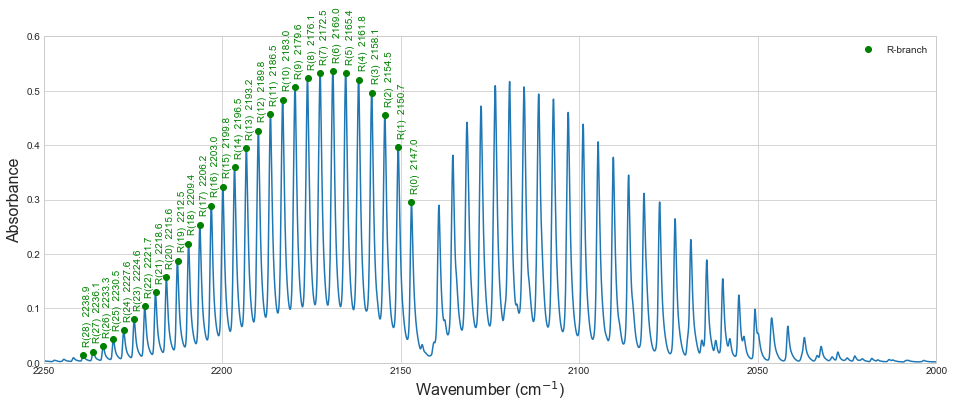

In [19]:
fig= plt.figure(figsize=(16,6))

#plt.plot(x[peaks[0]],y[peaks[0]],"ro")
plt.plot(x,y)

xmin = 2000
xmax = 2250
ymin = 0.0
ymax= 0.6
plt.xlim(xmax,xmin)
plt.ylim(ymin,ymax)

######### Choose the indices of the peaks associated with the R-branch (R(0) is at 2147cm-1)
R = [113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,
    135,136,137,138,139,140,141]     # Complete the list of indices AND label from the middle outwards
offsetR = 0        # Update the offset to assign the upper quantum number
#########

R_x = np.array([],dtype=np.float64)
R_y = np.array([],dtype=np.float64)
JR = np.array([],dtype=np.int64)

for i in range(len(R)):
    R_x = np.append(R_x,x[peaks[0][R[i]]])
    R_y = np.append(R_y,y[peaks[0][R[i]]])
    JR = np.append(JR,i + offsetR) 
    stri = 'R({})  {:.5}'.format(JR[i],R_x[i])
    plt.text(R_x[i],R_y[i]+.02,stri,rotation=90,color='g')
    
plt.plot(R_x,R_y,'go',label= 'R-branch')
plt.xlabel('Wavenumber (cm$^{-1}$)', size=16)
plt.ylabel('Absorbance',size=16)
plt.legend()
plt.show()

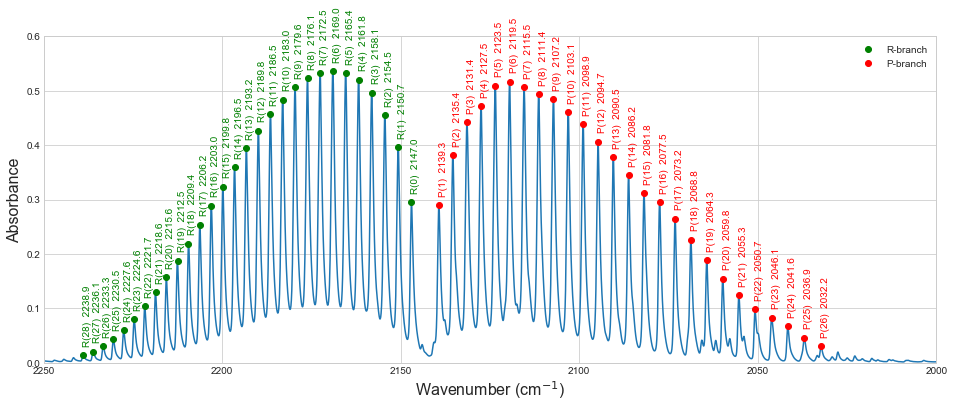

In [24]:
fig= plt.figure(figsize=(16,6))

#plt.plot(x[peaks[0]],y[peaks[0]],"ro")
plt.plot(x,y)

xmin = 2000
xmax = 2250
ymin = 0.0
ymax= 0.6
plt.xlim(xmax,xmin)
plt.ylim(ymin,ymax)

######### Choose the indices of the peaks associated with the main progression associated with v"=0
P = [111,110,109,108,107,106,105,104,103,102,101,100,99,98,97,96,95,94,92,90,88,86,85,84,83,82]     # Complete the list of indices AND label from the middle outwards
offsetP = 1        # Update the offset to assign the upper quantum number
#########

P_x = np.array([],dtype=np.float64)
P_y = np.array([],dtype=np.float64)
JP = np.array([],dtype=np.int64)

for i in range(len(P)):
    P_x = np.append(P_x,x[peaks[0][P[i]]])
    P_y = np.append(P_y,y[peaks[0][P[i]]])
    JP = np.append(JP,i + offsetP) 
    stri = 'P({})  {:.5}'.format(JP[i],P_x[i])
    plt.text(P_x[i],P_y[i]+0.02,stri,rotation=90,color='r')
  
for i in range(len(R)):
    stri = 'R({})  {:.5}'.format(JR[i],R_x[i])
    plt.text(R_x[i],R_y[i]+0.02,stri,rotation=90,color='g')


plt.plot(R_x,R_y,'go',label= 'R-branch')
plt.plot(P_x,P_y,'ro',label= 'P-branch')
plt.xlabel('Wavenumber (cm$^{-1}$)', size=16)
plt.ylabel('Absorbance',size=16)
plt.legend()
plt.show()

Store the picked wavenumbers (cm$^{-1}$) in the array `energy`. Create a new quantum number $m$, which will allow both sets of data to be plotted together on the same curve. Is it smooth?

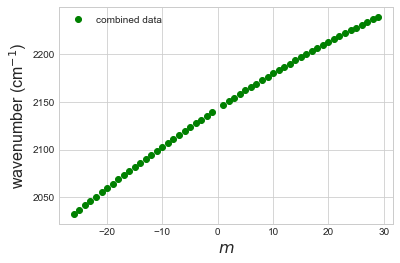

In [25]:
m = np.array([],dtype=np.int64)
energy = np.array([],dtype=np.float64)

for i in range(len(JR)):
    m = np.append(m,JR[i]+1)
    energy = np.append(energy,R_x[i])

for i in range(len(JP)):
    m = np.append(m,-JP[i])
    energy = np.append(energy,P_x[i])
    
    
plt.plot(m,energy,'go',label='combined data')
plt.xlabel('$m$',size=16)
plt.ylabel('wavenumber (cm$^{-1}$)',size=16)
plt.legend()
plt.show()

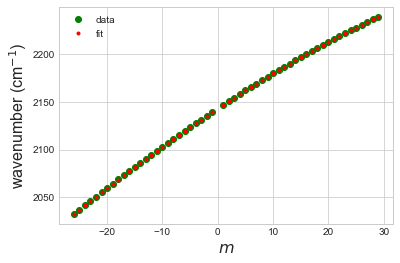

-0.017344046168143556 3.8268341555138434 2143.096016046199
B1 =  1.90474505467285  cm-1
B0 =  1.9220891008409935  cm-1
Be =  1.9307611239250653  cm-1
w =  2143.096016046199  cm-1


In [28]:
##fit a quadratic
def func(x,a,b,c,d,e):
    return a*x**2 + b*x + c + d*x**3 + e*x**4

optP, pcov = opt.curve_fit(func,m, energy)

plt.plot(m,energy,'go',label='data')
plt.plot(m,func(m,*optP),'r.',label='fit')

plt.xlabel('$m$',size=16)
plt.ylabel('wavenumber (cm$^{-1}$)',size=16)
plt.legend()
plt.show()

print(optP[0],optP[1],optP[2])

B0 = (optP[1]-optP[0])/2
B1 = (optP[1]+optP[0])/2
w = optP[2]

Be = B0 - 0.5*(B1-B0)

print('B1 = ',B1,' cm-1')
print('B0 = ',B0,' cm-1')
print('Be = ',Be,' cm-1')
print('w = ',w,' cm-1')

Literature is $B_e = 1.93128087$ cm$^{-1}$ - estimate errors in the your numberinos, if out... try adding a cubic term to the fit! This will account for higher order terms not present in the rigid rotor model, such as centrifugal distortion.

In [27]:
err_a = 2*pcov[0][0]**0.5
err_b = 2*pcov[1][1]**0.5

err_B0 = (err_a**2+err_b**2)**0.5

err_Be = (err_B0**2+(0.5*err_a)**2)**0.5

print('Be = ',Be,'+/-',err_Be,' cm-1')

Be =  1.9308261381234273 +/- 0.0012047342951936077  cm-1


In [34]:
emission = 2*B0*2.99792458e10
print('emission is expected at ',emission,'+/-',2*err_B0*2.9979e10,'GHz')
print('emission is expected at ',emission/1e9,'+/-',2*err_B0*2.9979e10/1e9,'GHz')

emission is expected at  115245563207.22626 +/- 72225558.14049412 GHz
emission is expected at  115.24556320722625 +/- 0.07222555814049413 GHz


In [108]:
4*4*Be/w**2

6.72850112449898e-06